## Mastering Machine Learning With scikit-learn
ch02

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [12]:
# 下載 http://www.monmonkey.com/sonota/font1/msjh.ttf
# sudo cp msjh.ttf /Library/Python/2.7/site-packages/matplotlib/mpl-data/fonts/ttf/
# rm ~/.matplotlib/fontList.cache
# 重新 import matplotlib.pyplot 時會找字型
matplotlib.rc('font', **{'family':'Microsoft JhengHei'})
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Python/2.7/site-packages/matplotlib/mpl-data/fonts/ttf/msjh.ttf')

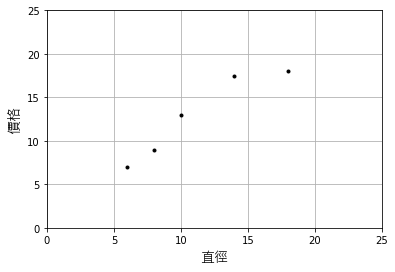

In [20]:
import numpy as np
# from matplotlib.font_manager import FontProperties
# 使用 pizza 的直徑跟價格來預測
# X = [[6],[8],[10],[14],[18]]  # 直徑, 英吋
X = np.array([[6], [8], [10], [14], [18]])
y = [[7],[9],[13],[17.5],[18]] # 價格 ,  美元

# font = FontProperties("~/Downloads/msjh.ttf",size=10)
plt.axis([0,25,0,25])
plt.grid(True)
plt.xlabel(u'直徑',fontproperties=font, fontsize=14)
plt.ylabel(u'價格',fontproperties=font, fontsize=14)
plt.plot(X, y ,'k.')
plt.show()

In [21]:
X1 = np.array([[6], [8], [10], [14], [18]])
print X1.shape

X2 = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
print X2.shape

(5, 1)
(5, 1)


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print "預測12吋pizza的價格:", model.predict(12)[0]

預測12吋pizza的價格: [ 13.68103448]


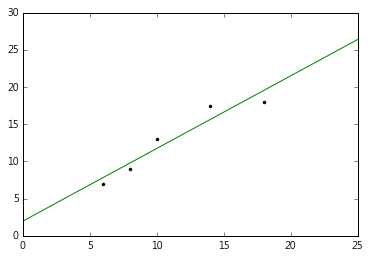

In [6]:
# 使用新的 pizza 尺寸 , 得到新的 y預測
X2 = [[0], [10], [14], [25]]
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')

In [7]:
y2

array([[  1.96551724],
       [ 11.72844828],
       [ 15.63362069],
       [ 26.37284483]])

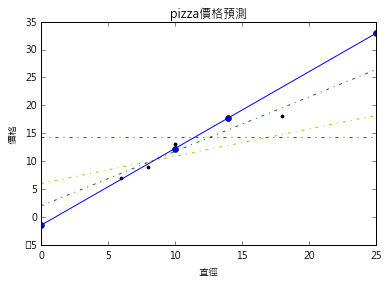

In [9]:
#一元線性回歸擬合模型的參數估計常用方法是普通最小二乘法（ordinary least squares ）或線性最小二乘法（linear least squares）。
#首先，我們定義出擬合成本函數，然後對參數進行數理統計。

#下圖是由若干參數生成的回歸直線。如何判斷哪一條直線才是最佳擬合呢？ 
plt.plot(X, y, 'k.')
y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2 * 0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)
plt.xlabel(u'直徑')
plt.ylabel(u'價格')
plt.title(u'pizza價格預測')
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-.')
plt.plot(X2, y3, 'r-.')
plt.plot(X2, y4, 'y-.')
plt.plot(X2, y5, 'o-')

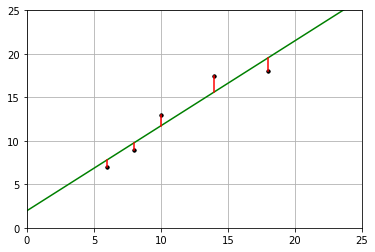

In [22]:
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')

# 殘差預測值
yr = model.predict(X)
plt.axis([0,25,0,25])
plt.grid(True)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')
    
plt.show()

In [23]:
import numpy as np
print('殘差平方和（成本函數）: %.2f' % np.mean((model.predict(X) - y) ** 2))

殘差平方和（成本函數）: 1.75


In [27]:
# Evaluating the model
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
score = model.score(X_test, y_test)

print "R-squared value(coefficient of determination):", score

R-squared value(coefficient of determination): 0.662005292942
